### Student Information
Name: 林哲兆 (NTPU)

Student ID: 711233103
 
GitHub ID: JoshLin1112

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [3]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

---
### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [4]:
for i in range(3):
    print(f"News {i+1}")
    print("\n".join(twenty_train.data[i].split("\n")))
    print('-'*100)

News 1
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

----------------------------------------------------------------------------------------------------
News 2
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a probl

---

In [7]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [8]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X.head(5)

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

---
### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [50]:
# EX1. Find the rows where the text contains "Michael"
X[X['text'].str.contains("Michael") == True]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
24    From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1   
46    From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
79    From: wdm@world.std.com (Wayne Michael) Subjec...         1   
103   From: mrb@cbnewsj.cb.att.com (m..bruncati) Sub...         2   
...                                                 ...       ...   
2215  From: michael@iastate.edu (Michael M. Huang) S...         2   
2221  From: mcovingt@aisun3.ai.uga.edu (Michael Covi...         3   
2222  From: hayesstw@risc1.unisa.ac.za (Steve Hayes)...         3   
2245  From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   

               category_name  \
0              comp.graphics   
24             comp.graphics   
46    soc.religion.christian   
79             comp.graphics   
103                  sci.med   
...                      ...   
2215                 sci.med   
2221  soc.religion.christian   
2222  soc.religion.christian   
2245                 sci.med   
2253                 sci.med   

                                               unigrams  \
0     [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
24    [From, :, mjw19, @, cl.cam.ac.uk, (, M.J., Wil...   
46    [From, :, jkellett, @, netcom.com, (, Joe, Kel...   
79    [From, :, wdm, @, world.std.com, (, Wayne, Mic...   
103   [From, :, mrb, @, cbnewsj.cb.att.com, (, m, .....   
...                                                 ...   
2215  [From, :, michael, @, iastate.edu, (, Michael,...   
2221  [From, :, mcovingt, @, aisun3.ai.uga.edu, (, M...   
2222  [From, :, hayesstw, @, risc1.unisa.ac.za, (, S...   
2245  [From, :, nyeda, @, cnsvax.uwec.edu, (, David,...   
2253  [From, :, mhollowa, @, ic.sunysb.edu, (, Micha...   

                                         tokenized_text  
0     {City, to, would, PC, this, (standard, of, Con...  
24    {see, real-time, QT, Troi, Cuddly, saying, say...  
46    {mercy, >C., (Joe, to, Kellett, would, more, a...  
79    {Michael), mail, (GNUISH)., under, Organizatio...  
103   {since, to, long, person, amount, ex-smoker's,...  
...                                                 ...  
2215  {see, believe, use, usually, thirst, eat,, And...  
2221  {Athens,, >Which, to, undue, would, :, as, pro...  
2222  {392,, become, say, to, would, >married,, this...  
2245  {become, say, me., to, >expressing, more, as, ...  
2253  {see, forecast, recipient, sleet, dialysis, sn...  

[123 rows x 5 columns]

In [51]:
# EX2. Find the rows where the catogory is comp.graphics
X[X['category'] == 1][::10].head(5)

text  category  \
0    From: sd345@city.ac.uk (Michael Collier) Subje...         1   
43   From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...         1   
76   From: sts@mfltd.co.uk (Steve Sherwood (x5543))...         1   
107  From: samson@prlhp1.prl.philips.co.uk (Mark Sa...         1   
172  From: thinman@netcom.com (Technically Sweet) S...         1   

     category_name                                           unigrams  \
0    comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
43   comp.graphics  [From, :, zyeh, @, caspian.usc.edu, (, zhengha...   
76   comp.graphics  [From, :, sts, @, mfltd.co.uk, (, Steve, Sherw...   
107  comp.graphics  [From, :, samson, @, prlhp1.prl.philips.co.uk,...   
172  comp.graphics  [From, :, thinman, @, netcom.com, (, Technical...   

                                        tokenized_text  
0    {City, to, would, PC, this, (standard, of, Con...  
43   {technique, use, deal, to, 4, share, Under, Ev...  
76   {39, where, courage, to, (Brian, all, 486, bui...  
107  {having, rights., Muchado), (UK), (UK)., to, p...  
172  {see, me., to, negative), etc., equipped,, thi...

In [52]:
# EX3. Find the rows where the text contains "Michael" and belongs to the comp.graphics category
X[(X['text'].str.contains("Michael") == True) & (X['category'] == 1)][::10].head(5)

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
680   From: scott@fcs280s.ncifcrf.gov (Michael Scott...         1   
1743  Subject: E-mail of Michael Abrash? From: gmont...         1   

      category_name                                           unigrams  \
0     comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
680   comp.graphics  [From, :, scott, @, fcs280s.ncifcrf.gov, (, Mi...   
1743  comp.graphics  [Subject, :, E-mail, of, Michael, Abrash, ?, F...   

                                         tokenized_text  
0     {City, to, would, PC, this, (standard, of, Con...  
680   {interface, use, #:, expensive, work., specify...  
1743  {A., State, Montemayor), Organization:, Calif,...

---
### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [53]:
X[X['category_name'] == 'sci.med'][::10].head(5)

text  category  \
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2   
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2   
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2   
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2   

    category_name                                           unigrams  \
7         sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
49        sci.med  [From, :, jimj, @, contractor.EBay.Sun.COM, (,...   
82        sci.med  [From, :, jason, @, ab20.larc.nasa.gov, (, Jas...   
118       sci.med  [From, :, rogers, @, calamari.hi.com, (, Andre...   
142       sci.med  [From, :, lady, @, uhunix.uhcc.Hawaii.Edu, (, ...   

                                        tokenized_text  
7    {meat)., skin, That's, where, say, more, going...  
49   {Mt., whatever., brings, long-lasting, althoug...  
82   {shopping., Center,, while, to, every, results...  
118  {believe, hard, to, as, just, this, extracted,...  
142  {believe, use, experienced, required, investig...

---
### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [54]:
# Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
# $Hint$ : `axis` parameter. Check the documentation for more information.

# change the axis parameter to 1
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

---
### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [55]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [56]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [57]:
# We can observe that 'NaN', 'None' and '' were not recognized as missing value.
# That's beacause they were recognized as "sting" format instead of "missing value" format.
# We have to create a missing value string list to correct the format.

In [58]:
missing_value_string = ['NaN', 'None', '']
NA_df['missing_example'] = NA_df['missing_example'].replace(missing_value_string, np.nan)
NA_df['missing_example'].isnull()

C:\Users\User\AppData\Local\Temp\ipykernel_31960\1080185348.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

---

In [59]:
X_sample = X.sample(n=1000) #random state
X_sample.head(5)

text  category  \
1147  From: fulk@cs.rochester.edu (Mark Fulk) Subjec...         2   
1468  From: andreasa@dhhalden.no (ANDREAS ARFF) Subj...         1   
1005  From: Mark W. Dubin Subject: Re: ringing ears ...         2   
2114  From: ab961@Freenet.carleton.ca (Robert Alliso...         2   
353   From: reedr@cgsvax.claremont.edu Subject: Re: ...         3   

               category_name  \
1147                 sci.med   
1468           comp.graphics   
1005                 sci.med   
2114                 sci.med   
353   soc.religion.christian   

                                               unigrams  \
1147  [From, :, fulk, @, cs.rochester.edu, (, Mark, ...   
1468  [From, :, andreasa, @, dhhalden.no, (, ANDREAS...   
1005  [From, :, Mark, W., Dubin, Subject, :, Re, :, ...   
2114  [From, :, ab961, @, Freenet.carleton.ca, (, Ro...   
353   [From, :, reedr, @, cgsvax.claremont.edu, Subj...   

                                         tokenized_text  
1147  {explanations, believe, That's, where, >could,...  
1468  {algorithms., having, forum, c.s.amiga.*., to,...  
1005  {believe, use, usually, Especially, reasonable...  
2114  {can't, Freenet, while, ultrasound,, improveme...  
353   {see, Jesus, to, Also, Paul, (John, as, like.,...

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [60]:
### Answer
# I found that the index has changed after the sample. 
# Further more, Without a fixed random state, the results of sample will vary with each run.
# To fix this issue, we need to reset the index and set a fixed random state for the sample function.
# Then we could obtain a fixed sample with new index.
X_sample = X.sample(n=1000, random_state=42).reset_index(drop=True)
X_sample.head(5)

text  category  \
0  From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
1  From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
2  From: noring@netcom.com (Jon Noring) Subject: ...         2   
3  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
4  From: keith@cco.caltech.edu (Keith Allan Schne...         0   

            category_name                                           unigrams  \
0                 sci.med  [From, :, ray, @, engr.LaTech.edu, (, Bill, Ra...   
1  soc.religion.christian  [From, :, jkellett, @, netcom.com, (, Joe, Kel...   
2                 sci.med  [From, :, noring, @, netcom.com, (, Jon, Norin...   
3  soc.religion.christian  [From, :, fraseraj, @, dcs.glasgow.ac.uk, (, A...   
4             alt.atheism  [From, :, keith, @, cco.caltech.edu, (, Keith,...   

                                      tokenized_text  
0  {TX, Organization:, town., Syndrome, X-Newsrea...  
1  {see, (Joe, to, Kellett, as, proven, western, ...  
2  {unlike, 'empirical', 417-4101, while, where, ...  
3  {now, usually, James, say, since, to, Dept., a...  
4  {can't, on,, to, <Political, just, this, 12, o...

---

category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

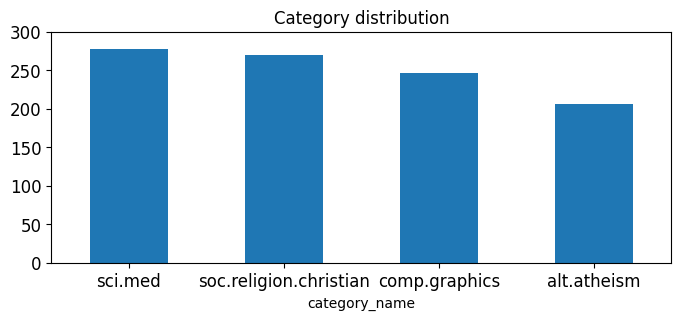

In [61]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

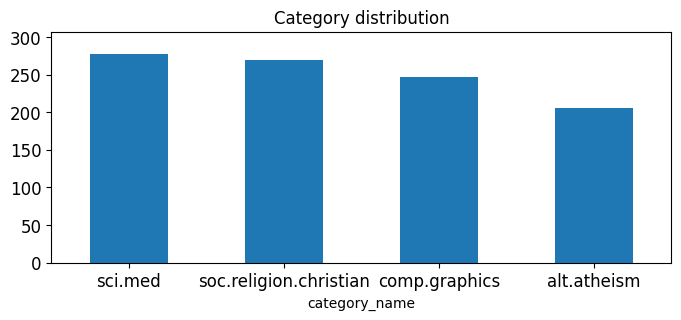

In [62]:
print(X_sample.category_name.value_counts())

# Set the y-axis upper bound to the maximum category count plus 30.
y_limit = max(X_sample.category_name.value_counts())
y_upper_bound = y_limit + 30

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, y_upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---
### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

                        All data  Sample data
category_name                                
alt.atheism                  480          206
comp.graphics                584          247
sci.med                      594          277
soc.religion.christian       599          270


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

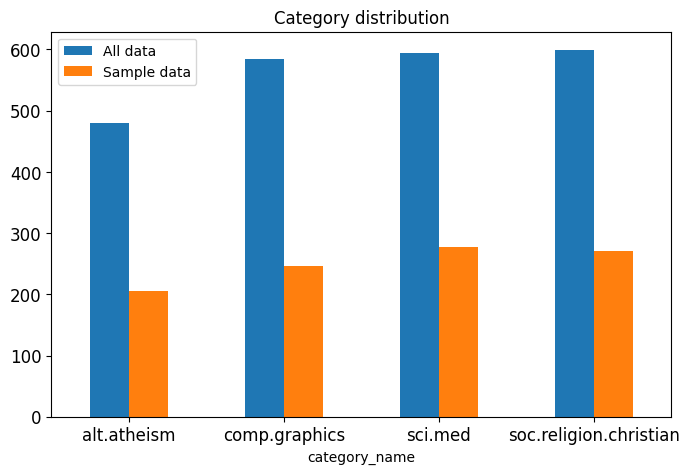

In [63]:
# first : merge two count table
sample_count = X_sample.category_name.value_counts()
all_count = X.category_name.value_counts()
category_counts = pd.merge(all_count,sample_count, left_index=True, right_index=True, how='outer')

# second : rename columns
category_counts.rename(columns={'count_x': 'All data', 'count_y': 'Sample data'}, inplace=True)
print(category_counts)
# third : plot barchart
y_upper_bound = max(X.category_name.value_counts()) + 30
category_counts.plot(kind='bar', title='Category distribution', 
                     ylim=[0, y_upper_bound], 
                     rot=0, fontsize=12, figsize=(8,5))

---

In [64]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [66]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [67]:
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---

In [68]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [69]:
# store the fifth sample as X_fifth_vec
X_fifth_vec = X_counts[4, 0:100].toarray() 

# find the index of value that is nonzero.
non_zero_index = np.where(X_fifth_vec != 0)[1]
print(non_zero_index)
count_vect.get_feature_names_out()[non_zero_index]
# by the output, we can know that another '1' represents '01'.

[ 0 37]


array(['00', '01'], dtype=object)

---
### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [70]:
# To use the data information efficiently, I'll only display the words appeared frequently.
# To determine how many features will be used, I'm going to select a frequency thereshold.
# About the sample size, I will choose a number that closely matches the number of word features.

In [71]:
# In order to find a proper thereshold, I'll use the following code ...
# to show the relationship between the number of terms and the frequency. 

X_counts_array = X_counts.toarray()
# calculate the total terms frequency.
word_frequcy = np.sum(X_counts_array,axis=0)
for i in np.arange(1000, 5000, 500):
    hf_word_number = len(np.where(word_frequcy > i)[0]) # find the index of terms that appear more than i
    print(f'There are {hf_word_number} words that appeared more than {i} times')

# I decided to choose the words that appear more than 3500 times.
# Because I found that the number of words remain almost the same when the frequency is over 3500.
# In other words, the words that appeared more than 3500 times can be sured that they are high frequency words.

There are 77 words that appeared more than 1000 times
There are 57 words that appeared more than 1500 times
There are 44 words that appeared more than 2000 times
There are 28 words that appeared more than 2500 times
There are 24 words that appeared more than 3000 times
There are 20 words that appeared more than 3500 times
There are 18 words that appeared more than 4000 times
There are 16 words that appeared more than 4500 times


['and' 'are' 'as' 'be' 'edu' 'for' 'from' 'have' 'in' 'is' 'it' 'not' 'of'
 'on' 'that' 'the' 'this' 'to' 'with' 'you']


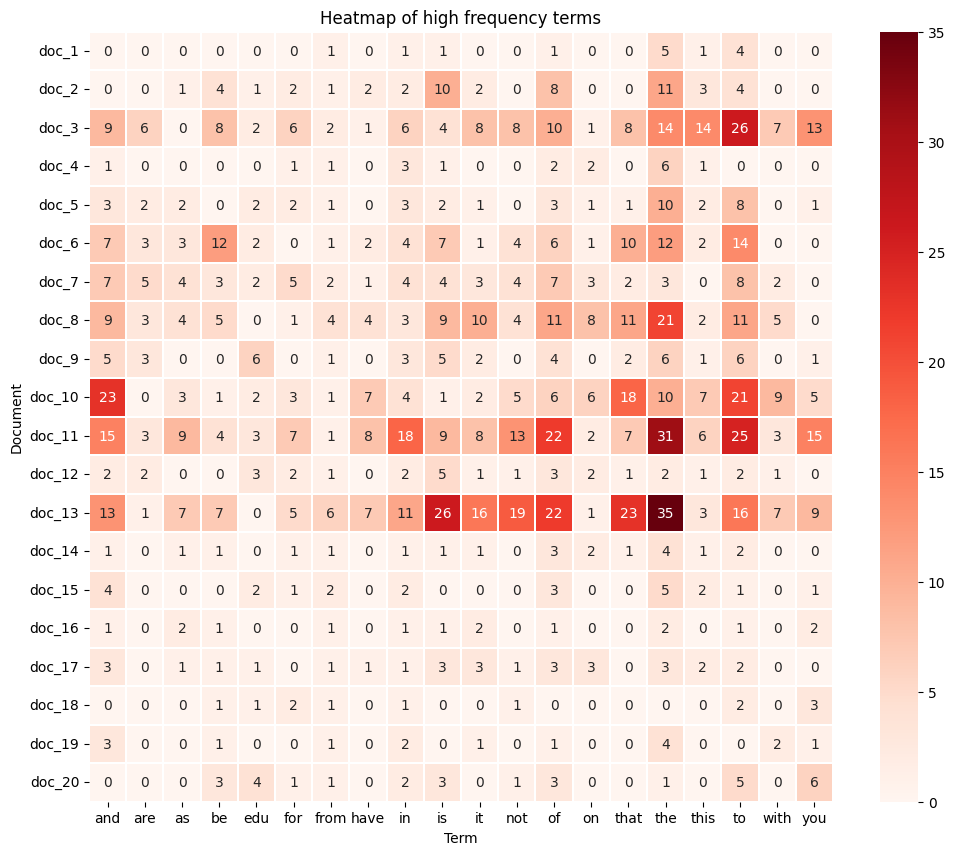

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# find the high frequency terms. (which appered more than 3500 times)
thereshold = 3500
feature_index = np.where(word_frequcy > thereshold)[0]
high_freq_words = count_vect.get_feature_names_out()[feature_index]
print(high_freq_words)

# use 20 samples and top 20 high frequency terms to generate a heat map.
sample_size = 20 
hf_word_matrix = X_counts[:sample_size, feature_index].toarray()

# generate a heat map by seaborn package.
doc_label = [f'doc_{i+1}' for i in range(sample_size)]
fig, ax = plt.subplots(figsize = (12, 10)) 
ax = sns.heatmap(hf_word_matrix, xticklabels=high_freq_words ,yticklabels=doc_label ,cmap='Reds', linewidths = 0.005, annot = True, cbar=True)
plt.xlabel('Term')
plt.ylabel('Document')
plt.title('Heatmap of high frequency terms')
plt.show()

---

In [73]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

C:\Users\User\AppData\Local\Temp\ipykernel_31960\3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



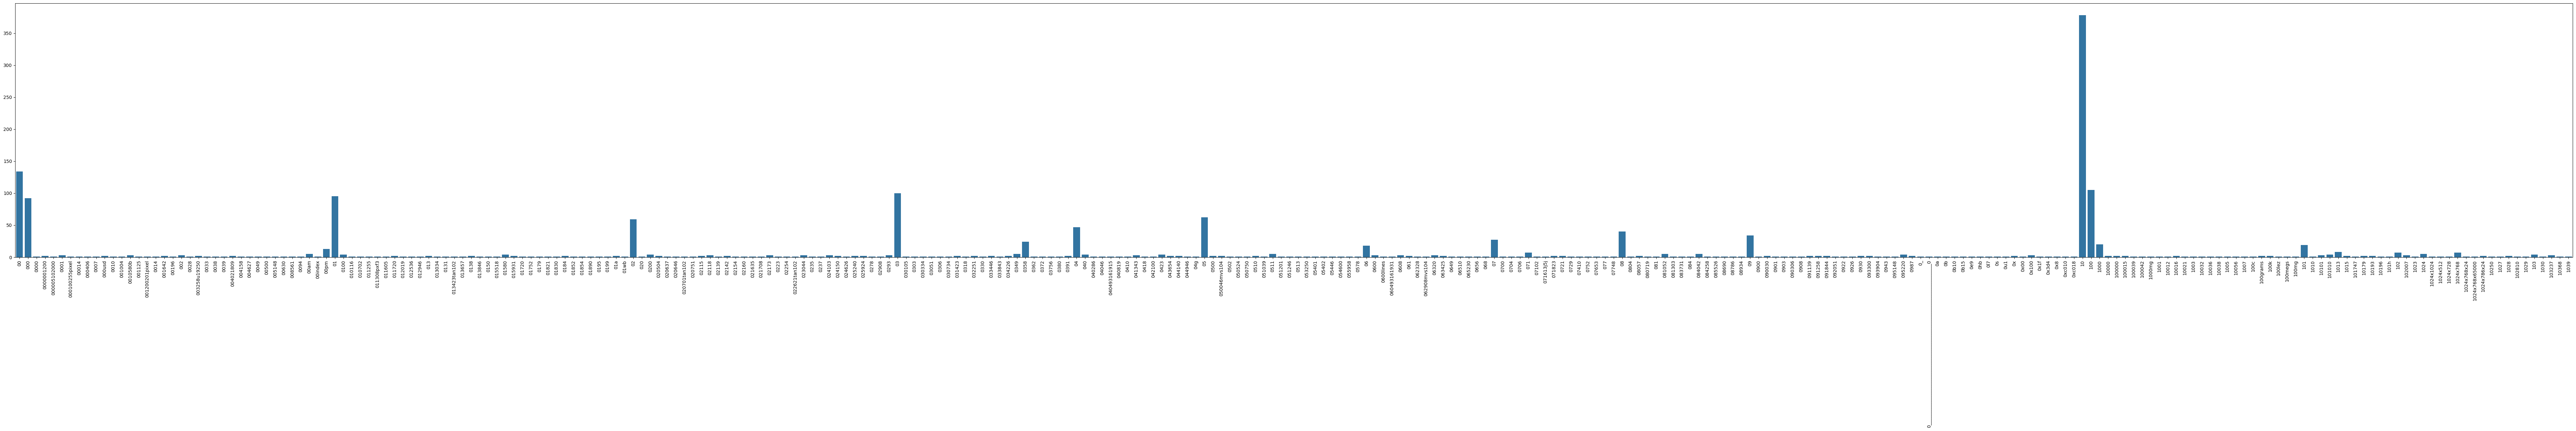

In [74]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [75]:
import plotly.graph_objects as go

x_values = count_vect.get_feature_names_out()[:300]
y_values = term_frequencies[:300]

# use plotly package create a frequency bar chart for the first 300 terms.
fig = go.Figure(go.Bar(x=x_values, y=y_values))
fig.update_layout(
    width=10000, 
    height=500,  
    xaxis=dict(
        tickangle=-90  
    ),
    title="Term Frequencies for Top 300 Terms",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
)
fig.show()


---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [76]:
# set a thereshold to find the high frequency terms
thereshold = 1000
feature_index = np.where(word_frequcy > thereshold)[0]
high_freq_words = count_vect.get_feature_names_out()[feature_index]

x_values = high_freq_words
y_values = word_frequcy[feature_index]

sorted_indices = np.argsort(y_values)[::-1]

sorted_x_values = x_values[sorted_indices]
sorted_y_values = y_values[sorted_indices]

fig = go.Figure(go.Bar(x=sorted_x_values, y=sorted_y_values))

fig.update_layout(
    width=2000, 
    height=500,  
    xaxis=dict(
        tickangle=-90  
    ),
    title="Term Frequencies for the terms apppered more than 1000 times",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
)
fig.show()

---
### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [77]:
# find the index of the words that appear more than 500 times
thereshold = 500
above_index = np.where(word_frequcy > thereshold)[0]
n_above = len(above_index)
below_index = np.where(word_frequcy <= thereshold)[0]
n_below = len(below_index)

# Divide the data into two parts : words appeared more than 500 times or less than 500 times.
x1_values = list(range(n_above)) 
y1_values = word_frequcy[above_index]
x2_values = list(range(n_above, n_above + n_below))  
y2_values = word_frequcy[below_index]

# Data sorted by term frequencies.
sorted_indices_above = np.argsort(y1_values)[::-1]
sorted_indices_below = np.argsort(y2_values)[::-1]

# Take log transform of y values 
sorted_x1_values = x1_values
log_sorted_y1_values = y1_values[sorted_indices_above]
sorted_x2_values = x2_values
log_sorted_y2_values = y2_values[sorted_indices_below]

# Graph two parts of data in a single figure.
fig = go.Figure()

# Terms appeared more than 500 times
fig.add_trace(go.Scatter(
    x=sorted_x1_values,
    y=log_sorted_y1_values,
    mode='lines',
    line=dict(color='red'),
    fill='tozeroy', 
    name=f'Frequency Above {thereshold}'
))

# Terms appeared less than 500 times
fig.add_trace(go.Scatter(
    x=sorted_x2_values, 
    y=log_sorted_y2_values,
    mode='lines',
    line=dict(color='orange'),
    fill='tozeroy', 
    name=f'Frequency Below {thereshold}'
))

# Update the layout
fig.update_layout(
    title="Long Tail Distribution of Term Frequencies",
    xaxis_title="Rank",
    yaxis_title="Frequency",
    template='plotly_dark', 
    xaxis=dict(range=[0, 300]),
    # xaxis=dict(type='linear'), 
    yaxis=dict(type='linear')
)
fig.show()

---
### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [78]:
# find the index of the words that appear more than 500 times
thereshold = 1000
above_index = np.where(word_frequcy > thereshold)[0]
n_above = len(above_index)
below_index = np.where(word_frequcy <= thereshold)[0]
n_below = len(below_index)

# Divide the data into two parts : words appeared more than 500 times or less than 500 times.
x1_values = list(range(n_above)) 
y1_values = word_frequcy[above_index]
x2_values = list(range(n_above, n_above + n_below))  
y2_values = word_frequcy[below_index]

# Data sorted by term frequencies.
sorted_indices_above = np.argsort(y1_values)[::-1]
sorted_indices_below = np.argsort(y2_values)[::-1]

# Take log transform of y values 
sorted_x1_values = x1_values
log_sorted_y1_values = np.log(y1_values[sorted_indices_above])
sorted_x2_values = x2_values
log_sorted_y2_values = np.log(y2_values[sorted_indices_below])

# Graph two parts of data in a single figure.
fig = go.Figure()

# Terms appeared more than 500 times
fig.add_trace(go.Scatter(
    x=sorted_x1_values,
    y=log_sorted_y1_values,
    mode='lines',
    line=dict(color='red'),
    fill='tozeroy', 
    name=f'Frequency Above {thereshold}'
))

# Terms appeared less than 500 times
fig.add_trace(go.Scatter(
    x=sorted_x2_values, 
    y=log_sorted_y2_values,
    mode='lines',
    line=dict(color='orange'),
    fill='tozeroy', 
    name=f'Frequency Below {thereshold}'
))

# Update the layout
fig.update_layout(
    title="Long Tail Distribution of Term Frequencies",
    xaxis_title="Rank",
    yaxis_title="Frequency",
    template='plotly_dark', 
    xaxis=dict(range=[0, 5000]),
    # xaxis=dict(type='linear'), 
    yaxis=dict(type='linear')
)
fig.show()

In [79]:
# After log-transforming the frequencies, the curve became smoother.
# That's because log transformation can make the extreme large values smaller.

---

In [80]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])


---
### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [81]:
# To find the difference and similarity between the four categories.
# I calculate the term frequency of each category and show the top 10 frequent terms of each category.

for i in range(4):

    category = categories[i]
    print("-"*30)
    print(f"Category {category}")
    print("number of features:", len(term_document_dfs[categories[i]].columns))

    # Get top 10 terms for each category
    top10_terms = term_document_dfs[category].sum().sort_values(ascending=False).head(10)

    # Create a DataFrame
    df = pd.DataFrame(top10_terms,columns=[category])
    display(df)

------------------------------
Category comp.graphics
number of features: 13756


comp.graphics
the            4537
to             2775
of             2470
and            2382
is             1751
in             1674
for            1598
it             1460
from           1186
you            1044

------------------------------
Category soc.religion.christian
number of features: 13872


soc.religion.christian
the                    11200
of                      6377
to                      6113
and                     4409
that                    4393
is                      4239
in                      3832
it                      2591
not                     2133
you                     1983

------------------------------
Category sci.med
number of features: 16257


sci.med
the      6854
of       4560
to       4085
and      3450
in       2993
is       2823
that     2166
it       2105
for      1463
edu      1388

------------------------------
Category alt.atheism
number of features: 11967


alt.atheism
the          7234
of           4253
to           4249
is           3530
that         3158
and          2776
in           2727
it           2291
you          1956
not          1578

In [82]:
# From the term frequency of each category, we can see that :  
# Although the number of features differs from each category, 
# the most frequent terms amomg the four categories are very similar.
# They are all have "the", "to", "of", "and"... this kind of conjunctions.
# That's the reason why we should do word preprocessing before tokenizing.
# Without these stopwords, we can finally see the difference among them.

---

In [83]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [84]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.13545846939086914


In [92]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.1957998275756836


In [93]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.25316786766052246


In [94]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.16487741470336914


### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [85]:
from PAMI.frequentPattern.topk import FAE as alg_topk

# define a function to run TopK algorithm
def run_fae_topk(file_path, k):

    obj = alg_topk.FAE(iFile=file_path, k=k)
    obj.mine()
    topKFrequentPatterns = obj.getPatterns() 
    print("Total number of Frequent Patterns:", len(topKFrequentPatterns))
    runtime = obj.getRuntime()
    return topKFrequentPatterns, runtime

file_path = 'td_freq_db_comp_graphics.csv'
k_values = [500, 1000, 1500]

print("FAE Top-K results:")
for k in k_values:
    patterns, runtime = run_fae_topk(file_path, k)
    print(f"runtime:{runtime:.2f}")
    print("first three patterns:")
    for i, (pattern, support) in enumerate(list(patterns.items())[:3]):
        print(f"  {pattern}: {support}")
    print()

FAE Top-K results:
 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 500
runtime:0.97
first three patterns:
  maybe: 26
  life: 24
  ideas: 24

 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 1000
runtime:2.22
first three patterns:
  maybe: 26
  life: 24
  ideas: 24

 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 1500
runtime:5.25
first three patterns:
  maybe: 26
  life: 24
  ideas: 24



In [86]:
# When we increse k, the runtime must increase, too.
# Besides, the change of runtime will be more significant than change of k.
# When k from 500 -> 1000 ,the runtime increased around two times
# When k from 1000 -> 1500 ,the runtime increased over two times

In [87]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg_maxfp

# define a function to run MaxFPGrowth algorithm
def run_maxfpgrowth(file_path, min_sup):

    obj = alg_maxfp.MaxFPGrowth(iFile=file_path, minSup=min_sup)
    obj.mine()
    maxfpgroethpatterns = obj.getPatterns()
    print("Total number of Frequent Patterns:", len(maxfpgroethpatterns))
    runtime = obj.getRuntime()
    return patterns, runtime

file_path = 'td_freq_db_comp_graphics.csv'
min_sup_values = [3, 6, 9]

print("MaxFPGrowth results:")
for min_sup in min_sup_values:
    patterns, runtime = run_maxfpgrowth(file_path, min_sup)
    print(f"min_sup = {min_sup}:")
    print(f"nuber of patterm:{len(patterns)}")
    print(f"runtime:{runtime:.2f}")
    print("first three patterns:")
    for i, (pattern, support) in enumerate(list(patterns.items())[-3:-1]):
        print(f"  {pattern}: {support}")
    print()

MaxFPGrowth results:
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 6872
min_sup = 3:
nuber of patterm:1500
runtime:15.09
first three patterns:
  convenience	discussing	favor	proposed	learn	personally	feel	wate: 12
  discussing	favor	proposed	learn	personally	feel	convenience: 12

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 1340
min_sup = 6:
nuber of patterm:1500
runtime:0.18
first three patterns:
  convenience	discussing	favor	proposed	learn	personally	feel	wate: 12
  discussing	favor	proposed	learn	personally	feel	convenience: 12

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 660
min_sup = 9:
nuber of patterm:1500
runtime:0.22
first three patterns:
  convenience	discussing	favor	proposed	learn	personally	feel	wate: 12
  discussing	favor	proposed	learn	personally	feel	

In [88]:
# Increasing the min_sup generally leads to a decrease in the number of frequent patterns and a reduction in runtime.
# Although we incresed min_sup by a fixed level each time, the number of patterns didn't decreased with a fixed level.
# min_sup level from 3 -> 6 , number of patterns decrease 1/6 times
# min_sup level from 6 -> 9 , number of patterns decrease 1/2 times
# Therefore, how to choose the best min_sup should be tested for several times.
# When we choose a proper min_sup level, we can finaly strike a balance between the information of data and the runtime.

In [89]:
# To compare the efficiency of MaxFPGrowth and FAE Top-K, we can set k equal 6872, 1340, 660.
# With the same number of patterns, we can see the difference of runtime between MaxFPGrowth and FAE Top-K method.
# And determine which one is a more efficient method.

file_path = 'td_freq_db_comp_graphics.csv'
k_values = [1340,660] # k=6872 took too long time to run, so I skiped it.
min_sups = [6, 9]

print("Runtime comparison:")
print("*"*30)
for k, min_sup in zip(k_values,min_sups):
    patterns, runtime_topk = run_fae_topk(file_path, k)
    patterns, runtime_maxFP = run_maxfpgrowth(file_path, min_sup)
    print(f"Topk runtime:{runtime_topk:.2f}")
    print(f"MaxFPGrowth runtime:{runtime_maxFP:.2f}")
    print('-'*30)

# From the output info. We can conclude that MaxFPGrowth is a more efficient way under the same number of patterns.

Runtime comparison:
******************************
 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 1340
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 1340
Topk runtime:1.83
MaxFPGrowth runtime:0.20
------------------------------
 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 660
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 660
Topk runtime:0.81
MaxFPGrowth runtime:0.07
------------------------------


---

In [95]:
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                              Patterns  Support
10626                              gov       33
10627                        institute       33
14745                          snm6394       32
10625                             form       31
14743                          deleted       30
...                                ...      ...
11763   princeton et axes scouts funds        9
11764  princeton boy axes scouts funds        9
11765           al et boy scouts funds        9
11766          al et axes scouts funds        9
0                                seven        9

[14746 rows x 2 columns]
Number of patterns discarded: 68291


In [96]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc boy axes scouts funds  \
0          0     0  ...                          0   
1          0     0  ...                          0   
2          0     0  ...                          0   
3          0     0  ...                          0   
4          0     0  ...                          0   
...      ...   ...  ...                        ...   
2252       0     0  ...                          0   
2253       0     0  ...                          0   
2254       0     0  ...                          0   
2255       0     0  ...                          0   
2256       0     0  ...                          0   

      princeton al et scouts funds  princeton al boy scouts funds  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   
...                            ...                            ...   
2252                             0                              0   
2253                             0                              0   
2254                             0                              0   
2255                             0                              0   
2256                             0                              0   

      princeton al axes scouts funds  princeton et boy scouts funds  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   
...                              ...                            ...   
2252                               0                              0   
2253                               0                              0   
2254                               0                              0   
2255                               0                              0   
2256                               0                              0   

      princeton et axes scouts funds  princeton boy axes scouts funds  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
...                              ...                              ...   
2252                               0                                0   
2253                               0                                0   
2254                               0                                0   
2255    

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

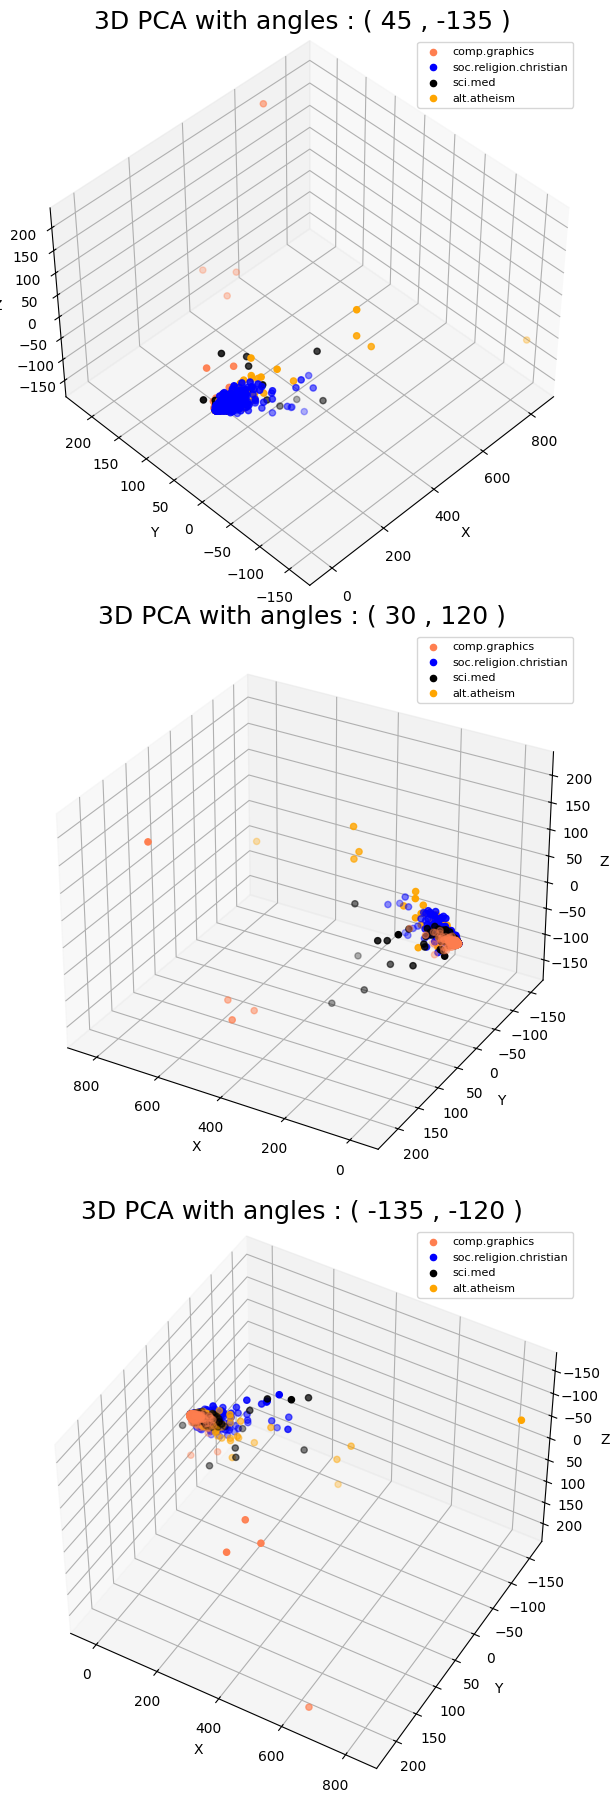

In [97]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# use four color for each category
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)

# define a function to plot the scatter plot with different angles
def plot_scatter_diff_angle(ax, X_reduced, angle_1=0, angle_2=0):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(f'3D PCA with angles : ( {angle_1} , {angle_2} )',fontsize=18)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right',fontsize=8)
    ax.view_init(angle_1, angle_2)


fig, ax = plt.subplots(3, 1, figsize=(10, 18), subplot_kw={'projection': '3d'})
# Custom angles
angle_set = [[45, -135], [30, 120], [-135, -120]]
for i in range(3):
    plot_scatter_diff_angle(ax[i], X_pca_tdm, angle_set[i][0], angle_set[i][1])

plt.tight_layout()
plt.show()


---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [98]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
# change category to category_name
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

                                      tokenized_text  bin_category  
0  {City, to, would, PC, this, (standard, of, Con...  [0, 1, 0, 0]  
1  {mesh, to, Dept., :, would, ,, Math, rendered....  [0, 1, 0, 0]  
2  {believe, use, harrassed, while, People, more,...  [0, 0, 0, 1]  
3  {church-state(government)., about, Organizatio...  [0, 0, 0, 1]  
4  {Jesus, to, "clothes", attend., customary,, (s...  [0, 0, 0, 1]  
5  {Electrical, say, Case, >doctor, arrogant., to...  [0, 0, 0, 1]  
6  {Paul's, forgiven, label, 34, news@cbnewsk.att...  [0, 0, 0, 1]  
7  {meat)., skin, That's, where, say, more, going...  [0, 0, 1, 0]  
8  {to, RGB., (John, just, >sensitive, respondent...  [0, 0, 1, 0]

In [99]:
# If we take names of catogories as labels, we should also change the variable of the fit function.
# By this way, we can obtain the same results as in the previous part.

---
### Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though). 

In [ ]:
#  In the this part, I will do the 19 exercises again and some processes that aren't exercise one but important on the new dataset.

## 2. Data Preparation + 3. Data Transformation

In [100]:
import pandas as pd
senti_yt_df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
senti_yt_df.head(5)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...

---
### **>>> Exercise 1-2 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [101]:
for i in range(3):
    print(f"News {i+1}")
    print("\n".join(senti_yt_df['comment'][i].split("\n")))
    print('-'*100)

News 1
He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
----------------------------------------------------------------------------------------------------
News 2
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
----------------------------------------------------------------------------------------------------
News 3
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I th

---
### 3.2 Familiarizing yourself with the Data
### **>>> Exercise 2-2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [102]:
# do some other querying techniques
senti_yt_df[senti_yt_df['sentiment'] == 'nostalgia']

sentiment                                            comment
1     nostalgia  The mist beautiful voice ever I listened to hi...
2     nostalgia  I have most of Mr. Reeves songs.  Always love ...
4     nostalgia  listening to his songs reminds me of my mum wh...
5     nostalgia  Every time I heard this song as a child, I use...
6     nostalgia  My dad loved listening to Jim Reeves, when I w...
...         ...                                                ...
1488  nostalgia  Yup !!!!  Bringing back an Enormous amount of ...
1491  nostalgia  real music...how i miss those days...brings ba...
1492  nostalgia  i used to cry over this song cause i had a boy...
1498  nostalgia  I was born in 1954 and started to be aware of ...
1499  nostalgia  This is the first CD I bought after my marriag...

[750 rows x 2 columns]

In [103]:
# do some other querying techniques
random_wordlist = ['love', 'beautiful', 'like']
senti_yt_df[senti_yt_df['comment'].str.contains('|'.join(random_wordlist))]

sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
6         nostalgia  My dad loved listening to Jim Reeves, when I w...
7         nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
...             ...                                                ...
1493  not nostalgia  He really has that "love you like a brother" l...
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[525 rows x 2 columns]

---
### **>>> Exercise 3-2 (Watch Video):**  
Try to fetch records belonging to the ```nostalgia``` category, and query every 10th record. Only show the first 5 records.

In [104]:
senti_yt_df[senti_yt_df['sentiment'] == 'nostalgia'][::10].head(5)

sentiment                                            comment
1   nostalgia  The mist beautiful voice ever I listened to hi...
18  nostalgia  My Grandparents had a pub in the 1970's, this ...
32  nostalgia  I remember my Mom listening to Jim over and ov...
50  nostalgia  If I remember correctly, this song came out af...
71  nostalgia  Gosh does this bring back memories. Nearly eve...

---
## 4. Data Mining using Pandas
### >>> **Exercise 4-2 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [105]:
import helpers.data_mining_helpers as dmh

senti_yt_df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0)

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [106]:
senti_yt_df.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

---
## 5.  Data Preprocessing
### 5.1 Sampling

### >>> Exercise 6-2 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [107]:
senti_yt_df_sample = senti_yt_df.sample(n=1000).reset_index(drop=True)
senti_yt_df_sample.head(8)

sentiment                                            comment
0      nostalgia          Thank you i remember this song as a child
1  not nostalgia  Does anyone know the dark haired actress ?. Th...
2  not nostalgia  wow...great interpretation of the song...this ...
3      nostalgia  My Dad introduced me to the carpenters when I ...
4      nostalgia                   Brings back many happy memories.
5  not nostalgia  And With Sarah Vaughan, their voices were so u...
6  not nostalgia  I really wish I could have experienced this at...
7      nostalgia  Don't know but this song has some kind of magi...

---
### >>> **Exercise 7-2 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sentiment
not nostalgia    508
nostalgia        492
Name: count, dtype: int64


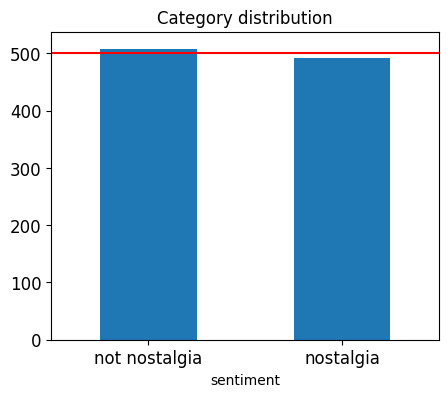

In [108]:
import matplotlib.pyplot as plt

# calculate the count of each category
print(senti_yt_df_sample['sentiment'].value_counts())
y_limit = max(senti_yt_df_sample['sentiment'].value_counts()) 
y_upper_bound = y_limit + 30
# plot barchart for X_sample
senti_yt_df_sample['sentiment'].value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, y_upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (5,4))
# gragh a y=500 line
plt.axhline(y=500, color='r', linestyle='-')

---
### >>> **Exercise 8-2 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

               All data  Sample data
sentiment                           
nostalgia           750          492
not nostalgia       750          508


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

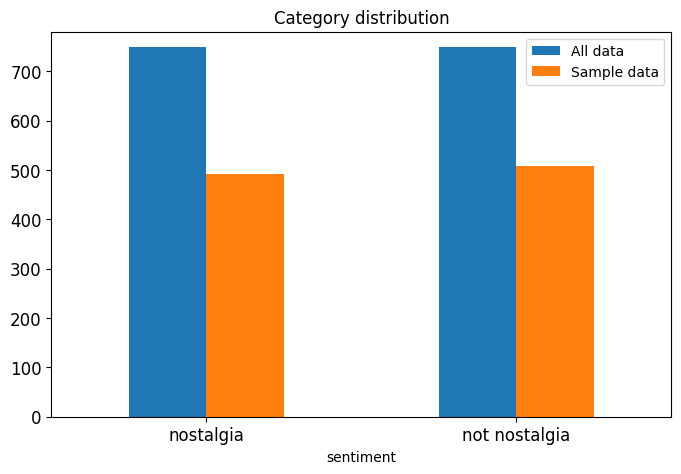

In [109]:
# first : merge two count table
sample_count = senti_yt_df_sample['sentiment'].value_counts()
all_count = senti_yt_df['sentiment'].value_counts()
category_counts = pd.merge(all_count,sample_count, left_index=True, right_index=True, how='outer')

# second : rename columns
category_counts.rename(columns={'count_x': 'All data', 'count_y': 'Sample data'}, inplace=True)
print(category_counts)
# third : plot barchart
y_limit = max(senti_yt_df['sentiment'].value_counts()) 
y_upper_bound = y_limit + 30
category_counts.plot(kind='bar', title='Category distribution', 
                     ylim=[0, y_upper_bound], 
                     rot=0, fontsize=12, figsize=(8,5))

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
senti_yt_df_counts = count_vect.fit_transform(senti_yt_df['comment']) #learn the vocabulary and return document-term matrix
print(senti_yt_df_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [111]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---
### 5.2 Feature Creation

In [112]:
import nltk
senti_yt_df['unigrams'] = senti_yt_df['comment'].apply(lambda x: dmh.tokenize_text(x))
senti_yt_df[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

---
### 5.3 Feature subset selection

### **>>> Exercise 9-2 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [113]:
analyze(senti_yt_df['comment'][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

---
### **>>> Exercise 10-2 (take home):**
Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [114]:
import numpy as np
# store the first sample of senti_yt_df
senti_first_vec = senti_yt_df_counts[0,:].toarray() 

# find the index of value that is nonzero.
non_zero_index = np.where(senti_first_vec != 0)[1]
print(non_zero_index)
count_vect.get_feature_names_out()[non_zero_index]

[  15  214  233  245  258  323  573  593  907 1125 1249 1272 1347 1470
 1512 1591 1598 1606 1651 1733 1833 1964 2018 2028 2035 2082 2328 2341
 2671 2688 2973 2974 3124 3278 3282 3284 3304 3328 3336 3534 3538 3570
 3581 3650 3713]


array(['16years', 'age', 'all', 'although', 'and', 'at', 'but', 'can',
       'days', 'emotional', 'fan', 'feel', 'for', 'golden', 'great',
       'have', 'he', 'hear', 'his', 'in', 'jim', 'life', 'lord', 'love',
       'loving', 'many', 'now', 'of', 'reeves', 'relaxed', 'singer',
       'singers', 'still', 'thank', 'that', 'the', 'those', 'time', 'to',
       'voice', 'vouch', 'was', 'we', 'with', 'you'], dtype=object)

In [115]:
senti_yt_df_counts_array = senti_yt_df_counts.toarray()
# calculate the total term frequencies.
word_frequcy = np.sum(senti_yt_df_counts_array,axis=0)
# search a proper threshold
for i in np.arange(100, 500, 50):
    hf_word_number = len(np.where(word_frequcy > i)[0]) # find the index of terms that appear more than i
    print(f'There are {hf_word_number} words that appeared more than {i} times')

There are 59 words that appeared more than 100 times
There are 38 words that appeared more than 150 times
There are 25 words that appeared more than 200 times
There are 20 words that appeared more than 250 times
There are 16 words that appeared more than 300 times
There are 14 words that appeared more than 350 times
There are 10 words that appeared more than 400 times
There are 10 words that appeared more than 450 times


---

### 5.4 Attribute Transformation / Aggregation

### **>>> Exercise 11-2 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

['and' 'back' 'for' 'in' 'is' 'it' 'love' 'me' 'music' 'my' 'of' 'so'
 'song' 'that' 'the' 'this' 'to' 'was' 'when' 'you']


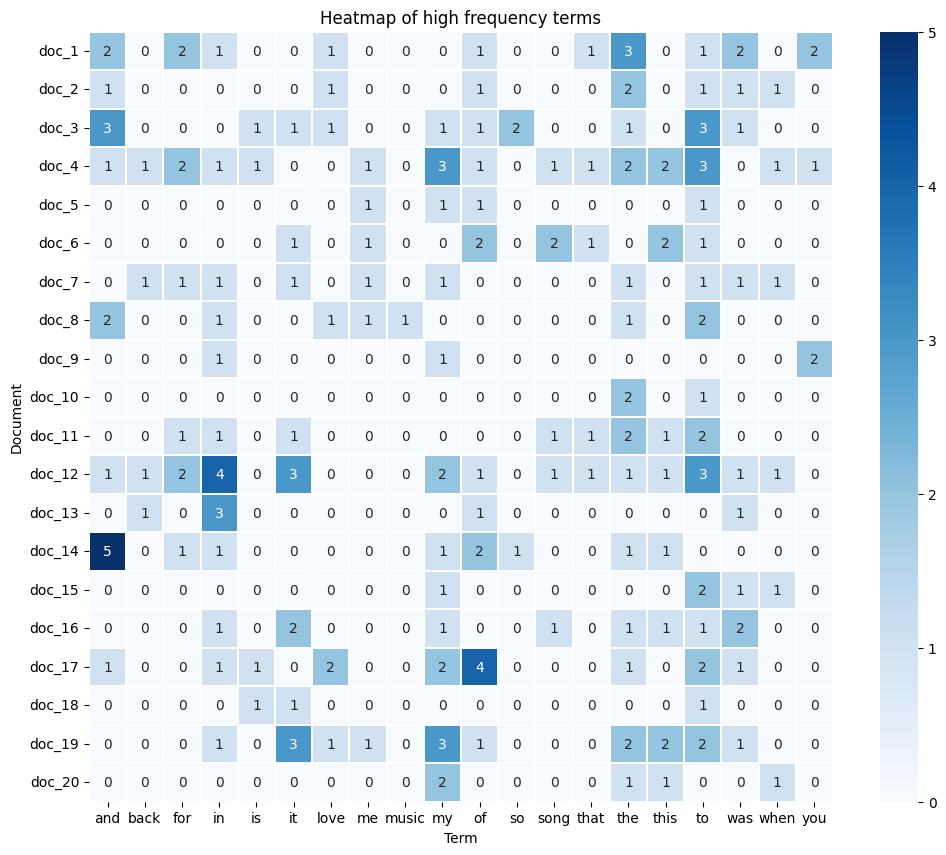

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# find the high frequency terms. (which appered more than 250 times)
thereshold = 250
feature_index = np.where(word_frequcy > thereshold)[0]
high_freq_words = count_vect.get_feature_names_out()[feature_index]
print(high_freq_words)

# use 20 samples and top 20 high frequency terms to generate a heat map.
sample_size = 20 
hf_word_matrix = senti_yt_df_counts[:sample_size, feature_index].toarray()

# generate a heat map by seaborn package.
doc_label = [f'doc_{i+1}' for i in range(sample_size)]
fig, ax = plt.subplots(figsize = (12, 10)) 
ax = sns.heatmap(hf_word_matrix, xticklabels=high_freq_words ,yticklabels=doc_label ,cmap='Blues', linewidths = 0.005, annot = True, cbar=True)
plt.xlabel('Term')
plt.ylabel('Document')
plt.title('Heatmap of high frequency terms')
plt.show()

In [117]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,senti_yt_df_counts.shape[1]):
    term_frequencies.append(sum(senti_yt_df_counts[:,j].toarray()))
term_frequencies = np.asarray(senti_yt_df_counts.sum(axis=0))[0]

---
### >>> **Exercise 12-2 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [118]:
import plotly.graph_objects as go

x_values = count_vect.get_feature_names_out()[:300]
y_values = term_frequencies[:300]

# use plotly package create a frequency bar chart for the first 300 terms.
fig = go.Figure(go.Bar(x=x_values, y=y_values))
fig.update_layout(
    width=10000, 
    height=500,  
    xaxis=dict(
        tickangle=-90  
    ),
    title="Term Frequencies for First 300 Terms",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
)
fig.show()

---
### >>> **Exercise 13-2 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [119]:
# find the index of the words that appear more than 20 times
thereshold = 20
feature_index = np.where(word_frequcy > thereshold)[0]
high_freq_words = count_vect.get_feature_names_out()[feature_index]

x_values = high_freq_words
y_values = word_frequcy[feature_index]

sorted_indices = np.argsort(y_values)[::-1]

sorted_x_values = x_values[sorted_indices]
sorted_y_values = y_values[sorted_indices]

fig = go.Figure(go.Bar(x=sorted_x_values, y=sorted_y_values))

fig.update_layout(
    width=2000, 
    height=500,  
    xaxis=dict(
        tickangle=-90  
    ),
    title="Term Frequencies for the terms apppered more than 20 times",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
)
fig.show()

---
### >>> **Exercise 14-2 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [120]:
# find the index of the words that appear more than 200 times
thereshold = 200
above_index = np.where(word_frequcy > thereshold)[0]
n_above = len(above_index)
below_index = np.where(word_frequcy <= thereshold)[0]
n_below = len(below_index)

# Divide the data into two parts : words appeared more than 500 times or less than 500 times.
x1_values = list(range(n_above)) 
y1_values = word_frequcy[above_index]
x2_values = list(range(n_above, n_above + n_below))  
y2_values = word_frequcy[below_index]

# Data sorted by term frequencies.
sorted_indices_above = np.argsort(y1_values)[::-1]
sorted_indices_below = np.argsort(y2_values)[::-1]

# Take log transform of y values 
sorted_x1_values = x1_values
log_sorted_y1_values = y1_values[sorted_indices_above]
sorted_x2_values = x2_values
log_sorted_y2_values = y2_values[sorted_indices_below]

# Graph two parts of data in a single figure.
fig = go.Figure()

# Terms appeared more than 200 times
fig.add_trace(go.Scatter(
    x=sorted_x1_values,
    y=log_sorted_y1_values,
    mode='lines',
    line=dict(color='red'),
    fill='tozeroy', 
    name=f'Frequency Above {thereshold}'
))

# Terms appeared less than 200 times
fig.add_trace(go.Scatter(
    x=sorted_x2_values, 
    y=log_sorted_y2_values,
    mode='lines',
    line=dict(color='orange'),
    fill='tozeroy', 
    name=f'Frequency Below {thereshold}'
))

# Update the layout
fig.update_layout(
    title="Long Tail Distribution of Term Frequencies",
    xaxis_title="Rank",
    yaxis_title="Frequency",
    template='plotly_dark', 
    xaxis=dict(range=[0, 300]),
    # xaxis=dict(type='linear'), 
    yaxis=dict(type='linear')
)
fig.show()

---
### >>> **Exercise 15-2 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [121]:
# find the index of the words that appear more than 500 times
thereshold = 200
above_index = np.where(word_frequcy > thereshold)[0]
n_above = len(above_index)
below_index = np.where(word_frequcy <= thereshold)[0]
n_below = len(below_index)

# Divide the data into two parts : words appeared more than 500 times or less than 500 times.
x1_values = list(range(n_above)) 
y1_values = word_frequcy[above_index]
x2_values = list(range(n_above, n_above + n_below))  
y2_values = word_frequcy[below_index]

# Data sorted by term frequencies.
sorted_indices_above = np.argsort(y1_values)[::-1]
sorted_indices_below = np.argsort(y2_values)[::-1]

# Take log transform of y values 
sorted_x1_values = x1_values
log_sorted_y1_values = np.log(y1_values[sorted_indices_above])
sorted_x2_values = x2_values
log_sorted_y2_values = np.log(y2_values[sorted_indices_below])

# Graph two parts of data in a single figure.
fig = go.Figure()

# Terms appeared more than 500 times
fig.add_trace(go.Scatter(
    x=sorted_x1_values,
    y=log_sorted_y1_values,
    mode='lines',
    line=dict(color='red'),
    fill='tozeroy', 
    name=f'Frequency Above {thereshold}'
))

# Terms appeared less than 500 times
fig.add_trace(go.Scatter(
    x=sorted_x2_values, 
    y=log_sorted_y2_values,
    mode='lines',
    line=dict(color='orange'),
    fill='tozeroy', 
    name=f'Frequency Below {thereshold}'
))

# Update the layout
fig.update_layout(
    title="Long Tail Distribution of Term Frequencies",
    xaxis_title="Rank",
    yaxis_title="Frequency",
    template='plotly_dark', 
    xaxis=dict(range=[0, 2000]),
    # xaxis=dict(type='linear'), 
    yaxis=dict(type='linear')
)
fig.show()

In [122]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category
categories = senti_yt_df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = senti_yt_df[senti_yt_df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

---
### >>> **Exercise 16-2 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [123]:
for i in range(2):

    category = categories[i]
    print("-"*30)
    print(f"Category {category}")
    print("number of features:", len(term_document_dfs[categories[i]].columns))

    # Get top 10 terms for each category
    top10_terms = term_document_dfs[category].sum().sort_values(ascending=False).head(10)

    # Create a DataFrame
    df = pd.DataFrame(top10_terms,columns=[category])
    display(df)

------------------------------
Category not nostalgia
number of features: 2602


not nostalgia
the             708
this            453
and             451
to              394
of              361
song            309
it              268
is              265
in              263
you             238

------------------------------
Category nostalgia
number of features: 2295


nostalgia
the         643
my          566
this        545
to          543
and         472
song        440
was         432
of          361
in          349
it          318

In [124]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


### >>> **Exercise 17-2 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of **200, 500, 1000**, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [125]:
# I revised the k values to be 200, 500, 1000.
# Because when I used k value higher than 1000, the runtime was too long.

from PAMI.frequentPattern.topk import FAE as alg_topk

# define a function to run TopK algorithm
def run_fae_topk(file_path, k):

    obj = alg_topk.FAE(iFile=file_path, k=k)
    obj.mine()
    topKFrequentPatterns = obj.getPatterns() 
    print("Total number of Frequent Patterns:", len(topKFrequentPatterns))
    runtime = obj.getRuntime()
    return topKFrequentPatterns, runtime

file_path = 'td_freq_db_nostalgia.csv'
k_values = [200, 500, 1000]

print("FAE Top-K results:")
for k in k_values:
    patterns, runtime = run_fae_topk(file_path, k)
    print(f"runtime:{runtime:.2f}")
    print("first three patterns:")
    for i, (pattern, support) in enumerate(list(patterns.items())[:3]):
        print(f"  {pattern}: {support}")
    print()

FAE Top-K results:
 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 200
runtime:0.08
first three patterns:
  this: 412
  my: 400
  the: 369

 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 500
runtime:0.52
first three patterns:
  this: 412
  my: 400
  the: 369

 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns: 1000
runtime:3.37
first three patterns:
  this: 412
  my: 400
  the: 369



In [126]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg_maxfp

# define a function to run MaxFPGrowth algorithm
def run_maxfpgrowth(file_path, min_sup):

    obj = alg_maxfp.MaxFPGrowth(iFile=file_path, minSup=min_sup)
    obj.mine()
    maxfpgroethpatterns = obj.getPatterns()
    print("Total number of Frequent Patterns:", len(maxfpgroethpatterns))
    runtime = obj.getRuntime()
    return maxfpgroethpatterns, runtime

file_path = 'td_freq_db_nostalgia.csv'
min_sup_values = [3, 6, 9]

print("MaxFPGrowth results:")
for min_sup in min_sup_values:
    patterns, runtime = run_maxfpgrowth(file_path, min_sup)
    print(f"min_sup = {min_sup}:")
    print(f"number of patterm:{len(patterns)}")
    print(f"runtime:{runtime:.2f}")
    print("first three patterns:")
    for i, (pattern, support) in enumerate(list(patterns.items())[0:3]):
        print(f"  {pattern}: {support}")
    print()

MaxFPGrowth results:
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 47915
min_sup = 3:
number of patterm:47915
runtime:48.67
first three patterns:
  the	skating	: 3
  the	and	walker	: 3
  and	in	scott	: 3

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 28197
min_sup = 6:
number of patterm:28197
runtime:9.68
first three patterns:
  1973	: 6
  the	looking	: 6
  actually	: 6

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total number of Frequent Patterns: 14451
min_sup = 9:
number of patterm:14451
runtime:2.87
first three patterns:
  karen	: 9
  right	: 9
  to	place	: 9



----

In [127]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia = obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 9704
Runtime: 0.16253662109375


In [128]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia = obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 71737
Runtime: 0.8112213611602783


In [129]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                     Patterns  Support
72337                memories      227
74586                   to my      227
74581                 song my      212
74590                the this      212
74588                  the my      192
...                       ...      ...
35820           we that on to        9
35803  was we that it to this        9
35802      we that it to this        9
35801       we that it to was        9
37295      miss me to the and        9

[74591 rows x 2 columns]
Number of patterns discarded: 6850


In [130]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
senti_tdm = count_vect.fit_transform(senti_yt_df['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
senti_yt_df['tokenized_text'] = senti_yt_df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=senti_yt_df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = senti_yt_df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
senti_tdm_df = pd.DataFrame(senti_tdm.toarray(), columns=terms, index=senti_yt_df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([senti_tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  \
0      0    0    0   0   0    0    0   0     0   0  ...   
1      0    0    0   0   0    0    0   0     0   0  ...   
2      0    0    0   0   0    0    0   0     0   0  ...   
3      0    0    0   0   0    0    0   0     0   0  ...   
4      0    0    0   0   0    0    0   0     0   0  ...   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...   
1495   0    0    0   0   0    0    0   0     0   0  ...   
1496   0    0    0   0   0    0    0   0     0   0  ...   
1497   0    0    0   0   0    0    0   0     0   0  ...   
1498   0    0    0   0   0    0    0   0     0   0  ...   
1499   0    0    0   0   0    0    0   0     0   0  ...   

      and we that on when to  we that on when to  we that on when and  \
0                          0                   0                    0   
1                          0                   0                    0   
2                          0                   0                    0   
3                          0                   0                    0   
4                          0                   0                    0   
...                      ...                 ...                  ...   
1495                       0                   0                    0   
1496                       0                   0                    0   
1497                       0                   0                    0   
1498                       0                   0                    0   
1499                       0                   0                    0   

      we that on when  we that on to and  we that on to  \
0                   0                  0              0   
1                   0                  0              0   
2                   0                  0              0   
3                   0                  0              0   
4                   0                  0              0   
...               ...                ...            ...   
1495                0                  0              0   
1496                0                  0              0   
1497                0                  0              0   
1498                0                  0              0   
1499                0                  0              0   

      was we that it to this  we that it to this  we that it to was  \
0                          0                   0                  0   
1                          0                   0                  0   
2                          0                   0                  0   
3                          0                   0                  0   
4                          0                   0                  0   
...                      ...                 ...                ...   
1495                       0                   0                  0   
1496                       0                   0                  0   
1497                       0                   0                  0   
1498                       0                   0                  0   
1499                       0                   0                  0   

      miss me to the and  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
1495                   0  
1496                   0  
1497                   0  
1498                   0  
1499                   0  

[1500 rows x 78321 columns]

---
### 5.5 Dimensionality Reduction

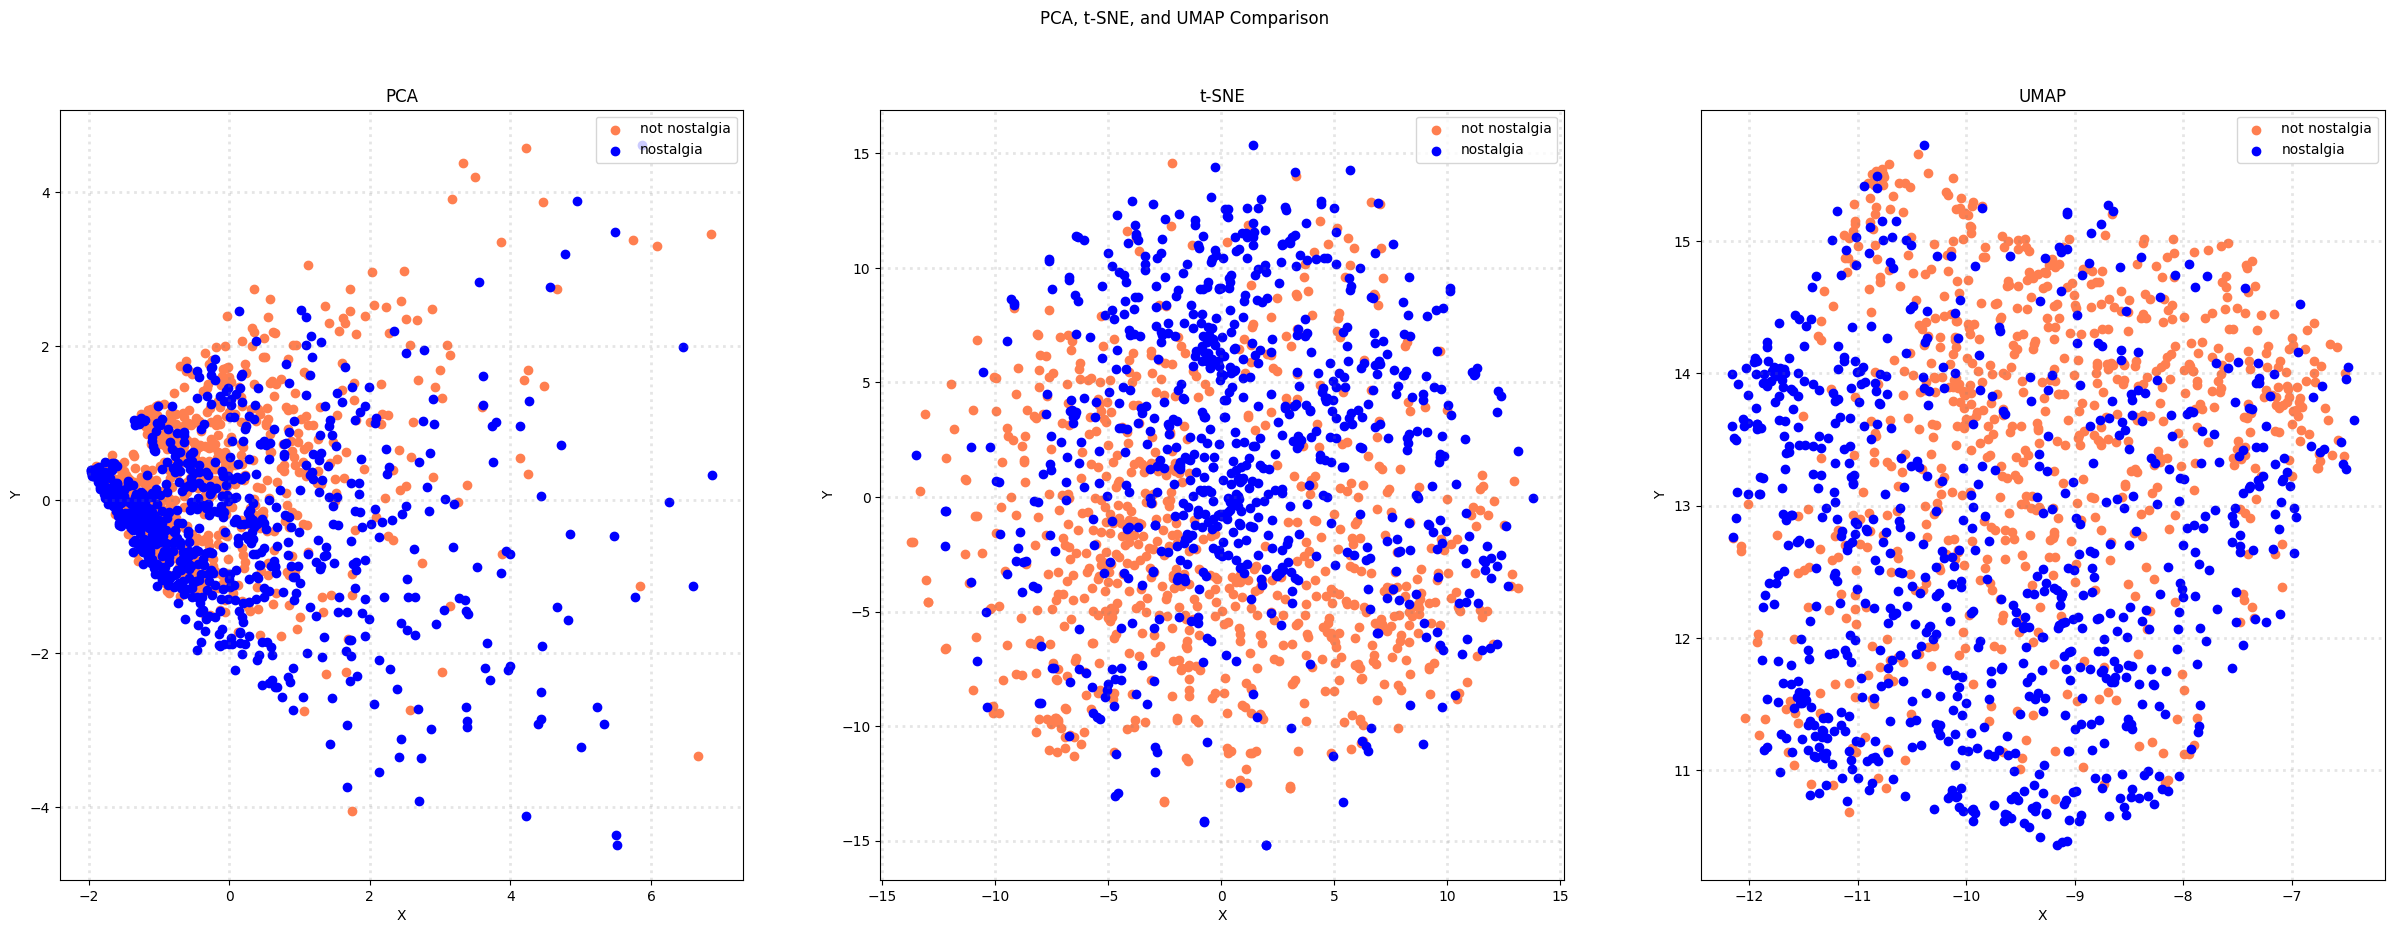

In [131]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import umap
import umap.umap_ as umap
import matplotlib.pyplot as plt
# Plot the results in subplots
col = ['coral', 'blue']
categories = senti_yt_df['sentiment'].unique() 
senti_pca_tdm = PCA(n_components=2).fit_transform(senti_tdm_df.values)
senti_tsne_tdm = TSNE(n_components=2).fit_transform(senti_tdm_df.values)
senti_umap_tdm = umap.UMAP(n_components=2).fit_transform(senti_tdm_df.values)

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[senti_yt_df['sentiment'] == category].T[0]
        ys = X_reduced[senti_yt_df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], senti_pca_tdm, 'PCA')
plot_scatter(axes[1], senti_tsne_tdm, 't-SNE')
plot_scatter(axes[2], senti_umap_tdm, 'UMAP')

plt.show()

### >>> Exercise 18-2 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

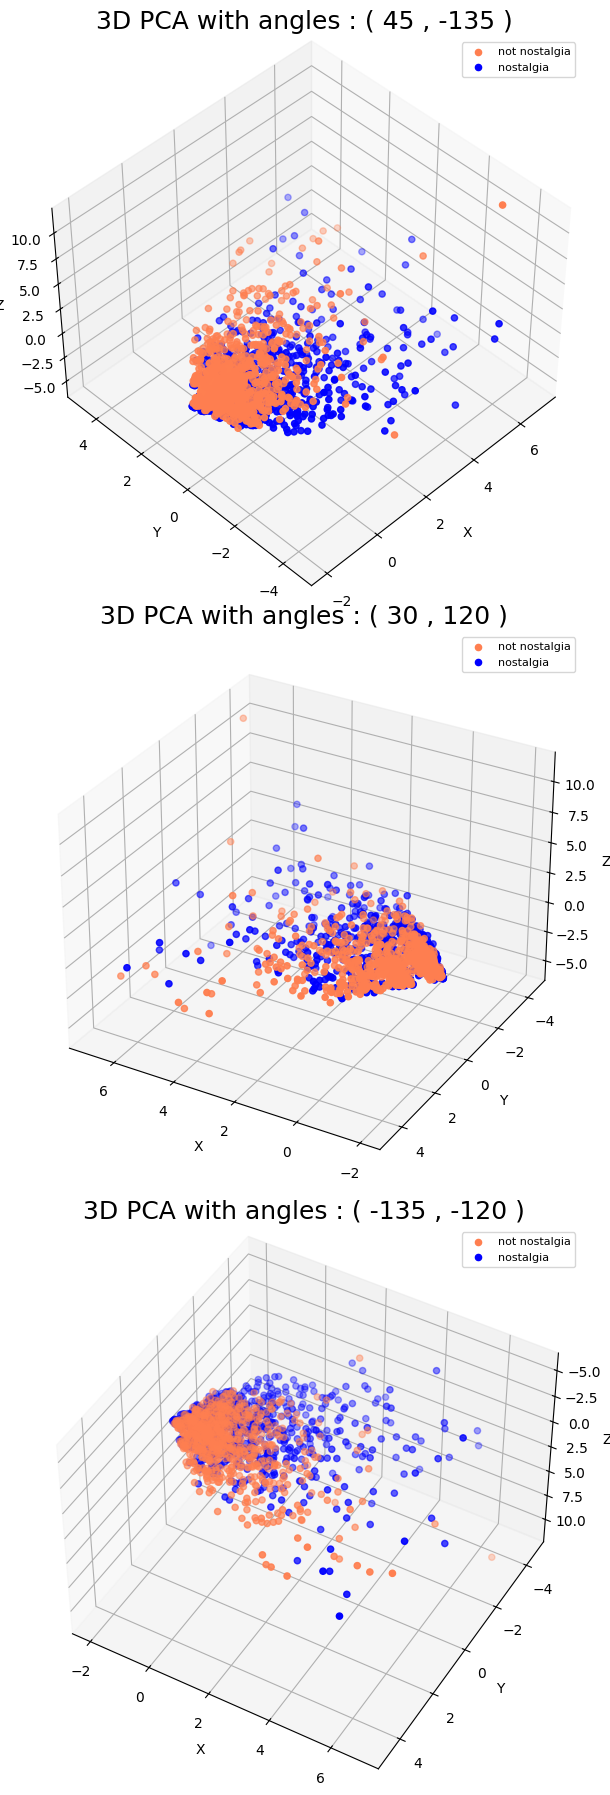

In [132]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# use four color for each category
col = ['coral', 'blue']
categories = senti_yt_df['sentiment'].unique() 
senti_pca_tdm = PCA(n_components=3).fit_transform(senti_tdm_df.values)

# define a function to plot the scatter plot with different angles
def plot_scatter_diff_angle(ax, X_reduced, angle_1=0, angle_2=0):
    for c, category in zip(col, categories):
        xs = X_reduced[senti_yt_df['sentiment'] == category].T[0]
        ys = X_reduced[senti_yt_df['sentiment'] == category].T[1]
        zs = X_reduced[senti_yt_df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(f'3D PCA with angles : ( {angle_1} , {angle_2} )',fontsize=18)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right',fontsize=8)
    ax.view_init(angle_1, angle_2)


fig, ax = plt.subplots(3, 1, figsize=(10, 18), subplot_kw={'projection': '3d'})
# Custom angles
angle_set = [[45, -135], [30, 120], [-135, -120]]
for i in range(3):
    plot_scatter_diff_angle(ax[i], senti_pca_tdm, angle_set[i][0], angle_set[i][1])

plt.tight_layout()
plt.show()


---

### 5.6 Discretization and Binarization 

### >>> **Exercise 19-2 (take home):**
Try to generate the binarization using the `sentiment` column instead. Does it work?

In [133]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
# change category to category_name
mlb.fit(senti_yt_df['sentiment'].unique())
senti_yt_df['bin_category'] = mlb.transform(senti_yt_df['sentiment']).tolist()
senti_yt_df[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {life., Although, but,, with, still, singer, g...          [1]  
1  {still, Never, love, to, kid, a, beautiful, vo...          [0]  
2  {my, with, job, how, great, love, leave, Jesus...          [0]  
3  {man, my, Now,, from, years, that, reality., l...          [1]  
4  {my, mum, his, me, who, songs, everyday, remin...          [0]  
5  {still, cry....because, that, RIP, souls., to,...          [0]  
6  {teenager, My, 70's, how, to, the, in, loved, ...          [0]  
7  {now, comes, am, with, ALSO, love, since, i, ....          [0]  
8        {my, are, always, you, Wherever, in, heart}          [1]

---
### 6. Data Exploration

In [134]:
document_to_transform_1 = []
random_record_1 = senti_yt_df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = senti_yt_df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = senti_yt_df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [135]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [136]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_31960\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_31960\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_31960\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\User\AppData\Local\Temp\ipykernel_31960\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

---
# 7. Data Classification

In [164]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Convert the numerical category labels to text labels
category_mapping = dict(zip(range(0, 2),senti_yt_df['sentiment'].unique()))
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(senti_tdm_df, senti_yt_df['sentiment'], test_size=0.3, random_state=42)

In [166]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=2))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia       0.79      0.93      0.85       225
    nostalgia       0.91      0.76      0.83       225

     accuracy                           0.84       450
    macro avg       0.85      0.84      0.84       450
 weighted avg       0.85      0.84      0.84       450



In [168]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, senti_yt_df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=2))

Accuracy: 0.7955555555555556

Classification Report:
                precision    recall  f1-score   support

not nostalgia       0.94      0.63      0.76       225
    nostalgia       0.72      0.96      0.82       225

     accuracy                           0.80       450
    macro avg       0.83      0.80      0.79       450
 weighted avg       0.83      0.80      0.79       450



---
### Third: please attempt the following tasks on the new dataset. This part is worth 30% of your grade.
- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.

In [137]:
# Wordcloud is a fancy visualizing tool for text data.
# It can display the most important terms of the texts.
# However, the stopwords would lead bias of important terms.
# Therefore, I displayed the wordcloud with two version: 
# one with stopwords and one without stopwords.

Wordcloud of term frequency with stopwords:


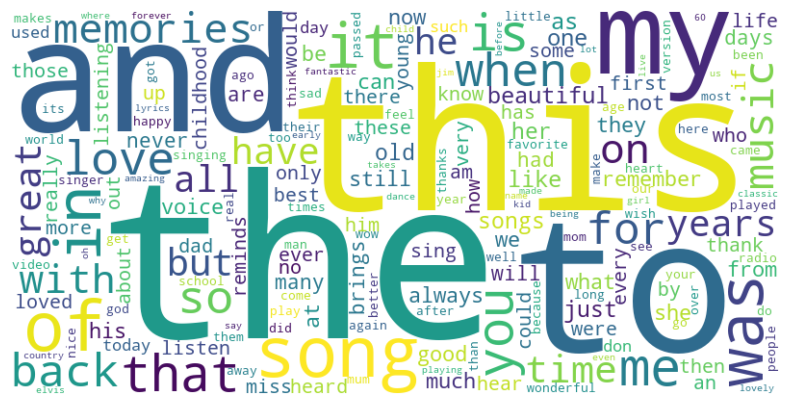

Wordcloud of term frequency without stopwords:


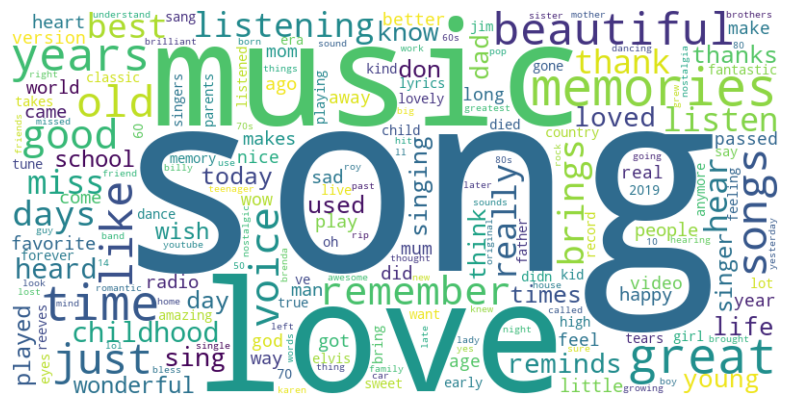

In [138]:
# First, I use term frequency approach to generate the wordcloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

# wordcloud generating function
def generate_wordcloud(count_matrix, feature_names):

    word_score_dict = dict(zip(feature_names, count_matrix.toarray().sum(axis=0)))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_score_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# term frequency wordcloud with stopwords
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(senti_yt_df['comment'])
feature_names = count_vectorizer.get_feature_names_out()
print('Wordcloud of term frequency with stopwords:')
generate_wordcloud(count_matrix, feature_names)

# term frequency wordcloud without stopwords
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(senti_yt_df['comment'])
feature_names = count_vectorizer.get_feature_names_out()
print('Wordcloud of term frequency without stopwords:')
generate_wordcloud(count_matrix, feature_names)

In [139]:
# Clearly, the wordcloud of term frequency with stopwords is more informative
# than that of term frequency without stopwords.

Wordcloud of term frequency in not nostalgia category:


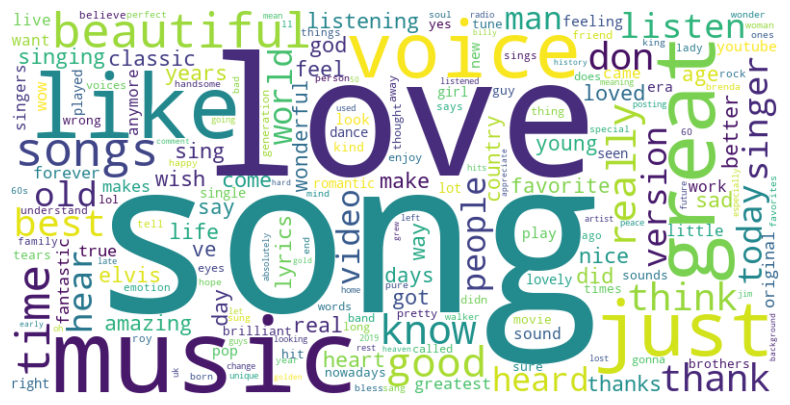

Wordcloud of term frequency in nostalgia category:


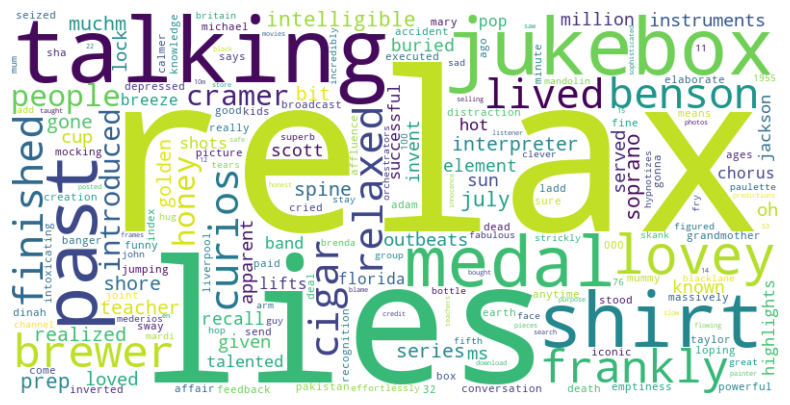

In [140]:
# Next, we can also check the difference of wordcloud between the two categories

nostalgia = senti_yt_df[senti_yt_df['sentiment'] == 'nostalgia']
not_nostalgia = senti_yt_df[senti_yt_df['sentiment'] != 'nostalgia']

# term frequency wordcloud with stopwords
count_vectorizer = CountVectorizer(stop_words='english')
# nostalgia
count_matrix_nostalgia = count_vectorizer.fit_transform(nostalgia['comment'])
# not_nostalgia
count_matrix_not_nostalgia = count_vectorizer.fit_transform(not_nostalgia['comment'])
feature_names = count_vectorizer.get_feature_names_out()
print('Wordcloud of term frequency in not nostalgia category:')
generate_wordcloud(count_matrix_not_nostalgia, feature_names)
print('Wordcloud of term frequency in nostalgia category:')
generate_wordcloud(count_matrix_nostalgia, feature_names)

- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .

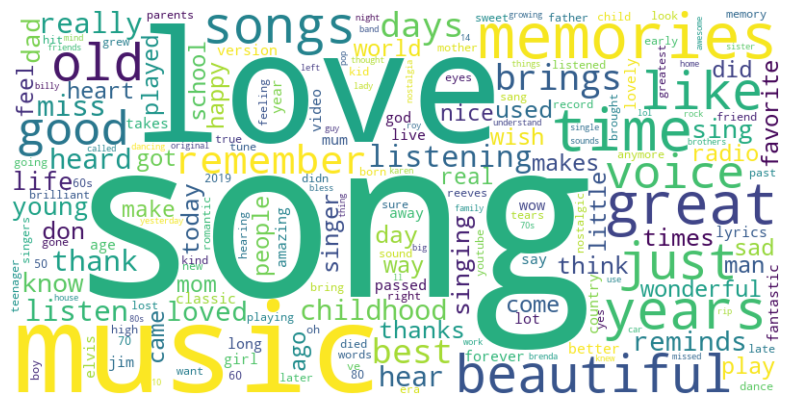

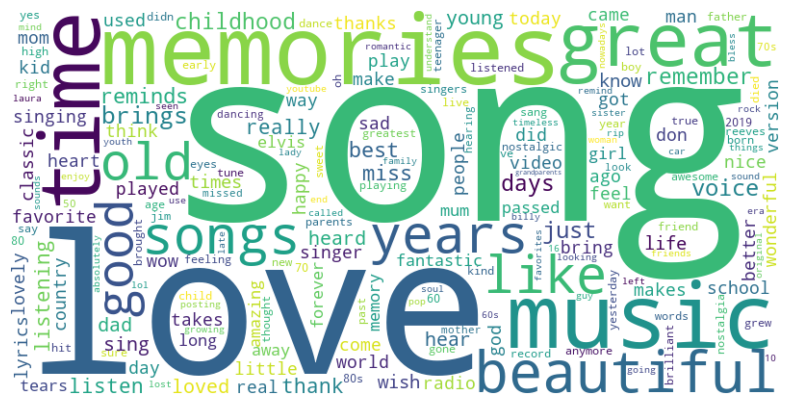

In [141]:
# Second, I used tf-idf approach to generate the wordcloud
# And compare it to the term frequency wordcloud

# term frequency without stopwords
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(senti_yt_df['comment'])
feature_names = count_vectorizer.get_feature_names_out()
generate_wordcloud(count_matrix, feature_names)

# Tf-idf without stopwords
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(senti_yt_df['comment'])
feature_names = tfidf_vectorizer.get_feature_names_out()
generate_wordcloud(tfidf_matrix, feature_names)

In [142]:
# We can see many common words like: love, song, music...,etc.
# In this case, the two approaches showed little difference in the wordcloud.

---
- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

labels = senti_yt_df['sentiment']

# train and test split
# term frequency
X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(count_matrix, labels, test_size=0.2, random_state=42)
# tf-idf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

# model
nb_model_count = GaussianNB()
nb_model_tfidf = GaussianNB()

X_count_train_dense = X_count_train.toarray()
X_tfidf_train_dense = X_tfidf_train.toarray()
X_count_test_dense = X_count_test.toarray()
X_tfidf_test_dense = X_tfidf_test.toarray()

# Now fit your models with the dense data
nb_model_count.fit(X_count_train_dense, y_count_train)
nb_model_tfidf.fit(X_tfidf_train_dense, y_tfidf_train)

# prediction
y_count_pred = nb_model_count.predict(X_count_test_dense)
y_tfidf_pred = nb_model_tfidf.predict(X_tfidf_test_dense)

# calculate accuracy (term frequency)
accuracy_count = accuracy_score(y_count_test, y_count_pred)
print(f"Accuracy by word frequency: {accuracy_count:.2f}")

# classification report (term frequency)
print("Classification Report from word frequency:")
print(classification_report(y_count_test, y_count_pred))

# calculate accuracy (tf-idf)
accuracy_tfidf = accuracy_score(y_tfidf_test, y_tfidf_pred)
print(f"Accuracy by TF-IDF: {accuracy_tfidf:.2f}")

# classification report (tf-idf)
print("Classification Report from TF-IDF:")
print(classification_report(y_tfidf_test, y_tfidf_pred))


Accuracy by word frequency: 0.67
Classification Report from word frequency:
               precision    recall  f1-score   support

    nostalgia       0.62      0.92      0.74       152
not nostalgia       0.84      0.42      0.56       148

     accuracy                           0.67       300
    macro avg       0.73      0.67      0.65       300
 weighted avg       0.73      0.67      0.65       300

Accuracy by TF-IDF: 0.67
Classification Report from TF-IDF:
               precision    recall  f1-score   support

    nostalgia       0.62      0.89      0.73       152
not nostalgia       0.79      0.44      0.57       148

     accuracy                           0.67       300
    macro avg       0.71      0.66      0.65       300
 weighted avg       0.70      0.67      0.65       300



---
## 4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

In [149]:
# I thought what isn't complete is the lack of word-preprocessing.
# Pre-processing is necessary to make the text-data more informative when we apply BOW or Word2Vec.
# We can defined a pre-processing function to solve this problem.
# The function can be used to lowercase, remove punctuations, stopwords and lemmatize.

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # 1. Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # 2. Convert to lowercase
    text = text.lower()
    # 3. Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # 4. Lemmatize
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


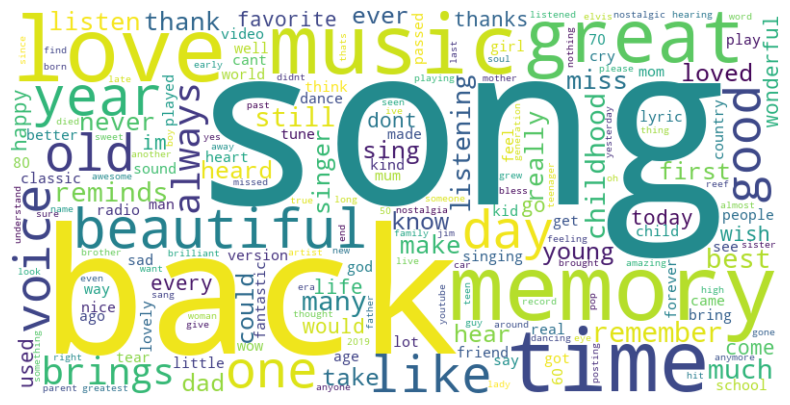

In [150]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

# With this function, we can preprocess the text first.
senti_yt_df['comment_processed'] = senti_yt_df['comment'].apply(preprocess_text)

# Then, we can apply TF-IDF   
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(senti_yt_df['comment_processed'])
feature_names = tfidf_vectorizer.get_feature_names_out()
generate_wordcloud(tfidf_matrix, feature_names)

In [151]:
# We can observe that there is a little difference in the wordcloud between 'preprocessing' and 'non-preprocessing'.
# The word 'back' didn't appear in the wordcloud when we hadn't applied preprocessing.